**Qu'est ce que le boosting ?**

C'est une méthode d"ensemble qui vise à créer un modèle fort à partir de plusieurs modèles plus faible. Concrètement, cela combine les prédictions de plusieurs modèles. Ces modèles sont de préférences simples et faibles. Dans le but d'améliorer la robustesse et la précision du modèle final.

**Comment cela fonctionne ?**

Contrairement au bagging, le boosting va se construire de manière itérative, séquentielle. En fait, chaque modèle va essayer de corriger les erreurs de modèle n-1.

A chaque itération, le boosting permet d'augmenter le poids des observations mal classées pour que le modèle suivant se concentre sur les cas difficiles. On peut voir cela comme une analyse qui augmente sa finesse au fur et à mesure, comme dans un entonnoir.

Pour cela, on va utiliser des modèles faibles ("Stumps"). Concrètement, l'idée est de corriger progressivement au lieu d'utiliser un modèle de machine de guerre dès le départ.

**Il existe deux types de boosting**

- *AdaBoost(Adaptive Boosting)* 
- *Gradient Boosting*

Dans ce notebook nous allons nous intéresser au Gradient Boosting. Il permet d'améliorer les prédictions en utilisant la descente de gradient pour minimiser les erreurs.
Dans une autre partie du cours, nous verrons que nous pouvons utiliser *XGBoost, LightGBM et CatBoost* qui sont des variations avancées du gradient boosting.

**Quels sont les avantages du boosting ?**

- *Une précision plus grande et une bonne performance , autant sur des problèmes de classification que de régression.*

- *Il corrige les erreurs et réduit la variance , cela réduit le biais gràce à la combinaison de plusieurs modèles*

**Quels sont les limites ?**

- *Le boosting peut provoqué un over-fitting s'il n'est pas bien régulé.*
- *Il est sensible aux outliers*

***Le Gradient Boosting*** est une technique avancée qui va construire un modèle prédictif robuste via plusieurs modèles plus faibles. On va faire cela avec des **arbres de décisions**. C'est comme une extension du Boosting.

Donc on garde l'idée de base du Boosting et nous construirons des modèles de manières séquentielle (itératives) pour permettre la correction des erreurs par la somme des modèles précédents.

***C'est ici la principale différence***
Elle réside dans la façon dont les erreurs sont gérées. Comme son nom le suppose, on va utiliser la *descente de gradient* pour minimiser la fonction coût.

*Concrètement comment ça marche ?*



L'utilisation du Gradient Boosting sur le dataSet des fleurs d'iris. Ce dataset est pertinent car il est adapté aussi bien pour la classification que la régression.

La question que nous nous posons est : "Comment pouvons-nous construire un modèle qui identifie avec précision la classe d'une fleur d'Iris (setosa, versicolor, ou virginica) en se basant sur ses caractéristiques (longueur et largeur des sépales et pétales) ?"

In [2]:
# Importation des bibliothèques nécessaires
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
# Etape 1: On charge le jeu de données
iris = load_iris()
X, y = iris.data, iris.target

In [4]:
# Etape 2: On prépare les données
# On divise le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Etape 3: On créer un modèle de Gradient Boosting
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)


ne n_estimators représente le nombre d'algorithme que nous utilisons pour le modèle lors de l'itération.<br>
Le learnin_rate représente la performance de chaque arbre sur le résultat final. ici 1.0 montre que chaque arbre contribue à 10 % à la prédiction finale. Si nous baissons ce taux alors la généralisation sera meilleure.<br>
Attention ! Si l'on baisse le learning_rate alors il faut augmenter le n_estimators pour maintenir la performance. Sinon nous augmentons le risque d'overfitting.<br>
Le max_depth représente la profondeur des arbres. Comme nous sommes sur des arbres simples alors aucun arbre ici ne dépassera trois niveaux de décisions. Si la profondeur grandit alors cela augmente le risque d'overfitting.

In [7]:
# Etape 4: On entraîne le modèle
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

In [8]:
# Etape 5: On évalue le modèle
# On prédit les résultats pour l'ensemble de test
y_pred = gb_classifier.predict(X_test)

In [9]:
# On calcule l'accuracy sur l'ensemble de test
accuracy = accuracy_score(y_test, gb_classifier.predict(X_test))
accuracy

0.9666666666666667

In [151]:
# on affiche la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Exactitude du modèle : {accuracy} ")
print(f"Matrice de confusion : { conf_matrix}")

Exactitude du modèle : 0.9666666666666667 
Matrice de confusion : [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


Pour connaître le chiffre le plus optimal pour le learning_rate , nous pouvons effectuer la validation croisée, le grid search ou random search

In [152]:
# On défini les valeurs de learning_rate à tester
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3]


# On prépare la validation croisée
param_grid = {'learning_rate': learning_rates}
cv_gb = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5)


In [153]:
# On effectue la validation croisée
cv_gb.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=1.0,
                                                  max_depth=1,
                                                  random_state=42),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]})

In [154]:
# On affiche les resultats pour chaque learning_rate

for learning_rate, score in zip(learning_rates, cv_gb.cv_results_['mean_test_score']):
    print(f"Learning rate : {learning_rate} - Mean CV Accuracy: {score}")

Learning rate : 0.01 - Mean CV Accuracy: 0.9166666666666666
Learning rate : 0.05 - Mean CV Accuracy: 0.95
Learning rate : 0.1 - Mean CV Accuracy: 0.9416666666666667
Learning rate : 0.2 - Mean CV Accuracy: 0.925
Learning rate : 0.3 - Mean CV Accuracy: 0.9166666666666666


In [155]:
# On sélectionne le meilleur learning_rate
best_learning_rate = cv_gb.best_params_['learning_rate']

In [156]:
# On évalue sur l'ensemble de test
best_gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=best_learning_rate, max_depth=3, random_state=42)
best_gb_classifier.fit(X_train, y_train)
y_pred = best_gb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Meilleur learning_rate : {best_learning_rate}")
print(f"Accuracy sur l'ensemble de test : {accuracy}")

Meilleur learning_rate : 0.05
Accuracy sur l'ensemble de test : 1.0


Dans un cas réel, un accuracy de 1.0 peut souvent signifier qu'il y a risque d'overfiting.<br>
Pour cela nous allons vérifier par un graphique les visualisations de ses performances à la fois sur les ensembles d'entrainement et de test durant l'itération.

In [157]:
import matplotlib.pyplot as plt

In [158]:
# Liste pour stocker les accuracy pour les ensembles d'entraînement et de test
train_accuracies = []
test_accuracies = []

In [159]:
# On évalue le modèle avec un nombre croissant d'arbres
estimator_range = range(1, 101, 10)  # De 1 à 100 arbres, par pas de 10
for n_estimators in estimator_range:
    model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=best_learning_rate, max_depth=3, random_state=42)
    model.fit(X_train, y_train)
    
    # On évalue sur l'ensemble d'entraînement
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # On évalue sur l'ensemble de test
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

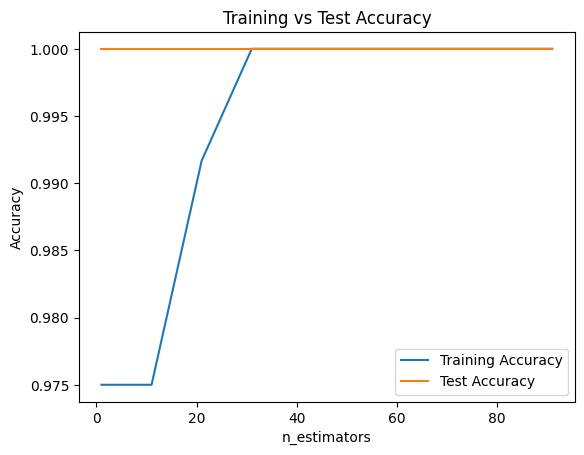

In [160]:
# On trace le graphique
plt.plot(estimator_range, train_accuracies, label='Training Accuracy')
plt.plot(estimator_range, test_accuracies, label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.title('Training vs Test Accuracy')
plt.legend()
plt.show()

Les hyperparamètres du Gradient Boost